In [1]:
import pandas as pd
episodeDetails = pd.read_pickle('episode_details.pkl')

In [ ]:
# Data Clean-up
# Remove row 50, 71
# As these rows are duplicates and smaller
episodeDetails = episodeDetails.drop([50, 71])
# Fix the date for a set row, as it's wrong
episodeDetails.at[588, 'Release Date'] = episodeDetails.iloc[586].Title

: 

: 

In [ ]:
episodeDetails.head()

,Episode Code,Title,Release Date,Body Text
0,m0017cry,"Lord Blunkett, David Davis MP, Nancy Fielder, ...",20 May 2022,Chris Mason presents political debate and disc...
1,m00174ld,"Catrina Davies, Jim McMahon MP, Selaine Saxby ...",13 May 2022,Chris Mason presents political debate and disc...
2,m0016y66,"Bim Afolami MP, Dame Margaret Beckett MP, Hele...",06 May 2022,Chris Mason presents political debate and disc...
3,m0016ppj,"Dr Stephen Farry MP, John Finucane MP, Claire ...",29 Apr 2022,Chris Mason presents political debate and disc...
4,m0016hj0,"Sir Geoffrey Clifton-Brown MP, Dame Meg Hillie...",22 Apr 2022,Anita Anand presents political debate and disc...


: 

: 

In [ ]:
import spacy
from spacy import displacy         

def extract_host(text):
    nlp = spacy.load("en_core_web_md")     
    sep = "Producer"
    stripped = text.split(sep, 1)[0]                                                                                                            
    sents = nlp(stripped)
    #displacy.render(sents, style="ent")   
    
    host= ""  
    
    host = [str(i) for i in ([ee for ee in sents.ents if ee.label_ == 'PERSON'])][0]
    print("Hosts: " + str(host))  
    
    return host 

def extract_names(text):
    nlp = spacy.load("en_core_web_md")     
    sep = "Producer"
    stripped = text.split(sep, 1)[0]                                                                                                            
    sents = nlp(stripped)
    displacy.render(sents, style="ent")
    
    # Return names
    names = ""
    
    # Remove any elements in list that are locations from nlp_wk
    nlp_wk = spacy.load('xx_ent_wiki_sm')                                                                                                                
    sents_wk = nlp_wk(stripped)
    locs = [str(i) for i in ([ee for ee in sents_wk.ents if ee.label_ == 'LOC'])]
    print("LOCs: " + str(locs))
    
    names = [str(i) for i in ([ee for ee in sents.ents if ee.label_ == 'PERSON'])]
    print("Names: " + str(names))
    
    no_loc_names = [x for x in names if x not in locs]
    
    return no_loc_names

: 

: 

In [ ]:
text = episodeDetails.iloc[20]['Body Text']
extract_host(text)

Hosts: Chris Mason


'Chris Mason'

: 

: 

In [ ]:
def extract_location(text):
    nlp_wk = spacy.load('xx_ent_wiki_sm')     
    sep = "Producer"
    stripped = text.split(sep, 1)[0]                                                                                                            
    sents = nlp_wk(stripped)
    
    # Return Location
    location = ""
    
    # Location extraction logic
    loc_check = [ee for ee in sents.ents if ee.label_ == 'LOC']
    print("LOCs: " + str(loc_check))
    if loc_check != []:
        print("We have LOC: " + str(len(loc_check)))
        
        # We should filter, so we only have loc's before the first non-loc
        s = list([ee for ee in sents.ents])
        s_labels = list([ee.label_ for ee in sents.ents])
        
        # find the first loc, iterate until difference
        first_loc = s_labels.index('LOC')
        end_of_loc = first_loc
        
        for i in range(first_loc, len(s_labels)):
            if s_labels[i] == 'LOC':
                end_of_loc += 1
            else:
                break
        
        before_first_loc = list(sents.ents)
        before_first_loc = before_first_loc[:before_first_loc.index(loc_check[0])]
        org_check = [ee for ee in before_first_loc if ee.label_ == 'ORG']
        print("ORGs: " + str(org_check))
        if org_check == []:
            # check if we have MISCs before it
            misc_check = [ee for ee in before_first_loc if ee.label_ == 'MISC']
            print("MISCs: " + str(misc_check))
            if misc_check == []:
                location = str(', '.join(str(e) for e in s[first_loc:end_of_loc]))
            else:
                location = str(misc_check[len(misc_check)-1]) + ", " + str(', '.join(str(e) for e in s[first_loc:end_of_loc]))
        else:
            print("We have ORG: " + str(len(org_check)))
            location = str(org_check[len(org_check) - 1]) + ", " + str(', '.join(str(e) for e in s[first_loc:end_of_loc]))
    else:
        # We have detected no locations in the text
        # So we return the first org
        location = [ee for ee in sents.ents if ee.label_ == 'ORG'][0]
        
    # location shouldn't have a newline, let's strip after that
    location = str(location).split("\n", 1)[0]  
    # location shouldn't have trailing spaces
    location = str(location).rstrip()
    return location

text = episodeDetails.iloc[20]['Body Text']

nlp_wk = spacy.load('xx_ent_wiki_sm')
doc = nlp_wk(text)
displacy.render(doc, style="ent")

extract_location(text)

LOCs: [St Luke's School]
We have LOC: 1
ORGs: []
MISCs: []


"St Luke's School"

: 

: 

In [ ]:
episodeDetails['Host'] = episodeDetails.apply(lambda row : extract_host(row['Body Text']), axis = 1)

Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Anita Anand
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Edward Stourton
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: C

: 

: 

In [ ]:
# Fix errors in the Host discovery process
episodeDetails.at[217, 'Host'] = 'Jonathan Dimbleby'
episodeDetails.at[406, 'Host'] = 'Jonathan Dimbleby'
episodeDetails.at[476, 'Host'] = 'Jonathan Dimbleby'

: 

: 

In [ ]:
episodeDetails.to_pickle('episode_details_with_host.pkl')

: 

: 

In [2]:
episodeDetails = pd.read_pickle('episode_details_with_host.pkl')

In [3]:
episodeDetails['Host'].value_counts().to_markdown()

'|                   |   Host |\n|:------------------|-------:|\n| Jonathan Dimbleby |    426 |\n| Chris Mason       |    124 |\n| Shaun Ley         |     27 |\n| Ritula Shah       |     27 |\n| Eddie Mair        |     20 |\n| Edward Stourton   |      8 |\n| Ed Stourton       |      8 |\n| Nick Robinson     |      6 |\n| Martha Kearney    |      5 |\n| Anita Anand       |      4 |\n| Julian Worricker  |      2 |\n| Glenn Campbell    |      1 |'

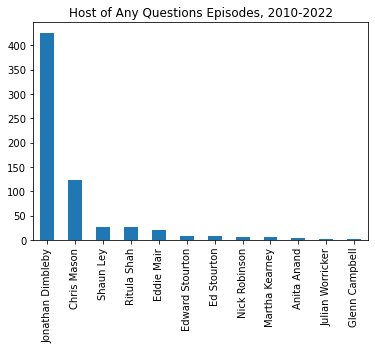

In [4]:
import matplotlib.pyplot as plt
host_stats = episodeDetails['Host'].value_counts()

# create the bar chart
ax = host_stats.plot.bar()
# set the title
ax.set_title("Host of Any Questions Episodes, 2010-2022")

#plt.show()
plt.savefig('images/hosts.png',bbox_inches='tight')

In [6]:
import numpy as np
from dateutil import parser
import datetime
import altair as alt
from altair_saver import save
import pandas as pd

startDF = episodeDetails[::-1]['Release Date'].to_numpy()
startDate = []
for i in range(0, len(startDF)):
    startDate.append(parser.parse(startDF[i]))
    
endDate = np.copy(startDate)
endDate = np.delete(endDate, 0)
endDate = np.append(endDate, endDate[len(endDate) - 1] + datetime.timedelta(days=7))

host = episodeDetails[::-1]['Host'].to_numpy()

alt.renderers.enable('jupyterlab')

data = pd.DataFrame()
data['from'] = startDate
data['to'] = endDate
data['Host'] = host

timeline = alt.Chart(data).mark_bar().encode(
    x=alt.X('from', axis=alt.Axis(title="")),
    x2='to',
    y='Host',
    color=alt.Color('Host', scale=alt.Scale(scheme='dark2'))
)

save(timeline, "images/timeline.png")

In [20]:
from datetime import datetime

def returnDay(date):
    if "/" not in date:
        return datetime.strptime(date, "%d %b %Y").strftime('%A')
    else:
        return datetime.strptime(date, "%d/%m/%Y").strftime('%A')
    
episodeDetails['Release Day'] = episodeDetails.apply(lambda row : returnDay(row['Release Date']), axis = 1)

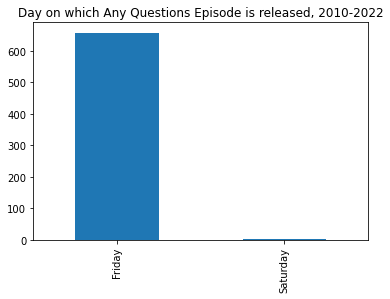

In [22]:
host_stats = episodeDetails['Release Day'].value_counts()

# create the bar chart
ax = host_stats.plot.bar()
# set the title
ax.set_title("Day on which Any Questions Episode is released, 2010-2022")

#plt.show()
plt.savefig('images/release_day.png',bbox_inches='tight')

In [30]:
episodeDetails['Body Text'][0]

'Chris Mason presents political debate and discussion from Sheffield Hallam University with Labour peer and former Home Secretary Lord Blunkett, Conservative MP and former Brexit Secretary David Davis, the editor of The Sheffield Star Nancy Fielder and the entrepreneur Dame Julie Kenny.\nProducer: Camellia Sinclair\nLead broadcast engineer: Phil Booth Read less'

In [53]:
def doHaveProducer(body_text):
    if "producer" not in body_text.lower():
        return False
    else:
        return True
    
def doHaveBroadcast(body_text):
    if "broadcast engineer" not in body_text.lower():
        return False
    else:
        return True
    
episodeDetails['Producer?'] = episodeDetails.apply(lambda row : doHaveProducer(row['Body Text']), axis = 1)
episodeDetails['Engineer?'] = episodeDetails.apply(lambda row : doHaveBroadcast(row['Body Text']), axis = 1)

In [54]:
episodeDetails['Producer?'].value_counts()

True     372
False    286
Name: Producer?, dtype: int64

In [134]:
hasProducer = episodeDetails[episodeDetails['Producer?'] == True]
# Drop episode from this dataframe with Body Text that is not crediting a Producer
hasProducer = hasProducer.drop([hasProducer[hasProducer['Body Text'].str.contains("University of Chester's Molloy Hall")].index[0]])

In [149]:
def whoWasTheProducer_local(body_text):
    #print("---\n"+body_text+"\n---")
    cut_start = ""
    if "Producer:" in body_text:
        cut_start = body_text.split("Producer: ", 1)[1]
    elif "Producer :" in body_text:
        cut_start = body_text.split("Producer : ", 1)[1]
    elif "Producer " in body_text:
        cut_start = body_text.split("Producer ", 1)[1]
    elif "Producers: " in body_text:
        cut_start = body_text.split("Producers: ", 1)[1]
    elif "producer in Bristol is " in body_text:
        cut_start = body_text.split("Bristol is ", 1)[1]
    elif "producer is " in body_text:
        cut_start = body_text.split("producer is ", 1)[1]
        
    cut_end = ""
    if "\n" in cut_start:
        cut_end = cut_start.split("\n")[0]
    elif "\n\n" in cut_start:
        cut_end = cut_start.split("\n\n")[0]
    elif "." in cut_start:
        cut_end = cut_start.split(".")[0]
    elif "Read less" in cut_start:
        cut_end = cut_start.split(" Read less")[0]
        
    if (cut_start == "") and (cut_end == ""):
        print("---\n"+body_text+"\n---")
    
    return cut_end.lstrip().rstrip()
  
hasProducer['Producer'] = hasProducer.apply(lambda row : whoWasTheProducer_local(row['Body Text']), axis = 1)

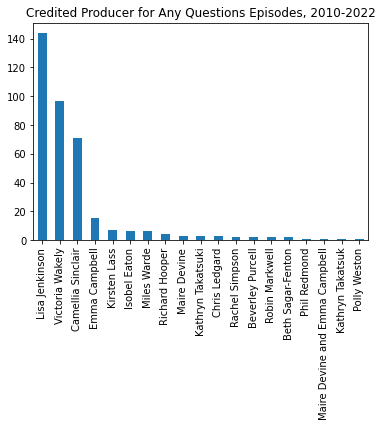

In [150]:
producer = hasProducer['Producer'].value_counts()

# create the bar chart
ax = producer.plot.bar()
# set the title
ax.set_title("Credited Producer for Any Questions Episodes, 2010-2022")

#plt.show()
plt.savefig('images/producer.png',bbox_inches='tight')

In [151]:
def whoWasTheProducer(body_text, check):
    # Manually edit row of dataframe with Body Text that is not crediting a Producer
    if "University of Chester's Molloy Hall" in body_text:
        return "No Credited Producer"
    elif check == True:
        return whoWasTheProducer_local(body_text)
    else:
        return "No Credited Producer"
    
episodeDetails['Producer'] = episodeDetails.apply(lambda row : whoWasTheProducer(row['Body Text'], row['Producer?']), axis = 1)

In [153]:
from dateutil.relativedelta import relativedelta

startDF = episodeDetails[::-1]['Release Date'].to_numpy()
startDate = []
endDate = []
for i in range(0, len(startDF)):
    startDate.append((pd.to_datetime(startDF[i]) - relativedelta(weeks=1)).to_datetime64())
    endDate.append(startDF[i])

host = episodeDetails[::-1]['Producer'].to_numpy()

alt.renderers.enable('jupyterlab')

data = pd.DataFrame()
data['from'] = startDate
data['to'] = endDate
data['Producer'] = host

timeline = alt.Chart(data).mark_bar().encode(
    x=alt.X('from', axis=alt.Axis(title="")),
    x2='to',
    y='Producer',
    color=alt.Color('Producer', scale=alt.Scale(scheme='dark2'))
)

save(timeline, "images/producer_timeline.png")

/tmp/ipykernel_6592/3892463012.py:7: UserWarning: Parsing '20/08/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  startDate.append((pd.to_datetime(startDF[i]) - relativedelta(weeks=1)).to_datetime64())


In [55]:
episodeDetails['Engineer?'].value_counts()

False    609
True      49
Name: Engineer?, dtype: int64

In [61]:
hasEngineer = episodeDetails[episodeDetails['Engineer?'] == True]

In [62]:
def whoWasTheEngineer(body_text):
    return body_text.split("engineer: ", 1)[1].split(" Read less", 1)[0]
    
hasEngineer['Engineer'] = hasEngineer.apply(lambda row : whoWasTheEngineer(row['Body Text']), axis = 1)

/tmp/ipykernel_6592/1726362497.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hasEngineer['Engineer'] = hasEngineer.apply(lambda row : whoWasTheEngineer(row['Body Text']), axis = 1)


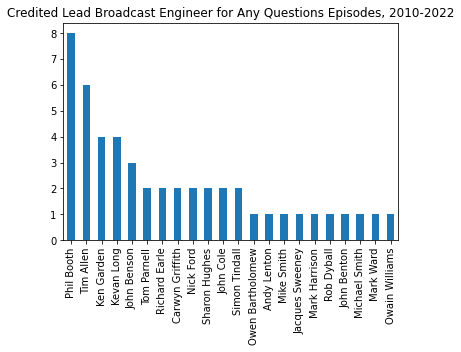

In [95]:
engineer = hasEngineer['Engineer'].value_counts()

# create the bar chart
ax = engineer.plot.bar()
# set the title
ax.set_title("Credited Lead Broadcast Engineer for Any Questions Episodes, 2010-2022")

#plt.show()
plt.savefig('images/engineer.png',bbox_inches='tight')

In [67]:
from dateutil.relativedelta import relativedelta

def whoWasTheEngineer(body_text, check):
    if check == True:
        return body_text.split("engineer: ", 1)[1].split(" Read less", 1)[0]
    else:
        return "No Credited Engineer"
    
episodeDetails['Engineer'] = episodeDetails.apply(lambda row : whoWasTheEngineer(row['Body Text'], row['Engineer?']), axis = 1)

startDF = episodeDetails[::-1]['Release Date'].to_numpy()
startDate = []
endDate = []
for i in range(0, len(startDF)):
    startDate.append((pd.to_datetime(startDF[i]) - relativedelta(weeks=1)).to_datetime64())
    endDate.append(startDF[i])

host = episodeDetails[::-1]['Engineer'].to_numpy()

alt.renderers.enable('jupyterlab')

data = pd.DataFrame()
data['from'] = startDate
data['to'] = endDate
data['Engineer'] = host

timeline = alt.Chart(data).mark_bar().encode(
    x=alt.X('from', axis=alt.Axis(title="")),
    x2='to',
    y='Engineer',
    color=alt.Color('Engineer', scale=alt.Scale(scheme='dark2'))
)

save(timeline, "images/engineer_timeline.png")

/tmp/ipykernel_6592/1360087424.py:15: UserWarning: Parsing '20/08/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  startDate.append((pd.to_datetime(startDF[i]) - relativedelta(weeks=1)).to_datetime64())


In [159]:
episodeDetails = episodeDetails.drop(['Producer?', 'Engineer?'], axis=1)
episodeDetails.head()

,Episode Code,Title,Release Date,Body Text,Host,Release Day,Engineer,Producer
0,m0017cry,"Lord Blunkett, David Davis MP, Nancy Fielder, ...",20 May 2022,Chris Mason presents political debate and disc...,Chris Mason,Friday,Phil Booth,Camellia Sinclair
1,m00174ld,"Catrina Davies, Jim McMahon MP, Selaine Saxby ...",13 May 2022,Chris Mason presents political debate and disc...,Chris Mason,Friday,Nick Ford,Camellia Sinclair
2,m0016y66,"Bim Afolami MP, Dame Margaret Beckett MP, Hele...",06 May 2022,Chris Mason presents political debate and disc...,Chris Mason,Friday,John Benton,Camellia Sinclair
3,m0016ppj,"Dr Stephen Farry MP, John Finucane MP, Claire ...",29 Apr 2022,Chris Mason presents political debate and disc...,Chris Mason,Friday,John Benson,Camellia Sinclair
4,m0016hj0,"Sir Geoffrey Clifton-Brown MP, Dame Meg Hillie...",22 Apr 2022,Anita Anand presents political debate and disc...,Anita Anand,Friday,Kevan Long,Emma Campbell


In [161]:
episodeDetails['Producer'].value_counts()

No Credited Producer              287
Lisa Jenkinson                    144
Victoria Wakely                    97
Camellia Sinclair                  71
Emma Campbell                      15
Kirsten Lass                        7
Isobel Eaton                        6
Miles Warde                         6
Richard Hooper                      4
Maire Devine                        3
Kathryn Takatsuki                   3
Chris Ledgard                       3
Rachel Simpson                      2
Beverley Purcell                    2
Robin Markwell                      2
Beth Sagar-Fenton                   2
Phil Redmond                        1
Maire Devine and Emma Campbell      1
Kathryn Takatsuk                    1
Polly Weston                        1
Name: Producer, dtype: int64